문제. 0

원인:
PositionalEncoding 레이어에서 SparseTensor를 연산하려고 할 때 발생하는 문제입니다. 

해결:
데이터셋 변환 시 Dense 보장 (모델에 들어가는 입력이 SparseTensor로 변환되지 않도록 보장하는 것)
Input Layer에서 명시적으로 sparse=False 지정
PositionalEncoding 내부에서 처리 (비추천) <- 이건 적용안함

문제. 1

원인:
tf.sparse.is_sparse() 라는 함수나 속성이 TensorFlow 2.x에서 더 이상 제공되지 않는 것에서 비롯됩니다. 
과거 TensorFlow 1.x에서는 tf.sparse.is_sparse()가 존재했지만, 2.x에서는 이를 사용할 수 없습니다.
대신, TensorFlow에서는 tf.sparse 모듈 내 연산을 사용하려면 주어진 텐서가 tf.SparseTensor 타입인지 직접 확인하는 방식을 사용합니다.

해결:
tf.sparse.is_sparse()는 사용 불가능합니다.
대신 isinstance(tensor, tf.SparseTensor)를 사용하여 SparseTensor 여부를 확인합니다.
이를 통해 SparseTensor일 경우 tf.sparse.to_dense()로 변환하는 로직을 적용했습니다.

문제. 2

원인:
해당 오류는 실제 y_true(타겟)와 y_pred(모델 출력)의 시퀀스 길이 차이에서 비롯됩니다. 에러 메시지를 자세히 보면 다음과 같습니다.
39 , 40 문제.

해결:
loss_function에서 불필요한 reshape 제거
dec_inputs와 outputs의 길이가 39로 동일하게 유지되는지 확인
필요하다면 loss_function 내에서 y_pred를 y_true 길이에 맞게 슬라이싱 (임시 방편)

문제. 3

원인:
현재 CustomSchedule 클래스의 __call__ 메서드에서 step은 int64 형태로 들어옵니다.
tf.math.rsqrt 및 tf.math.minimum 등 부동소수점 연산은 float형 입력을 기대합니다.
따라서 step을 float32로 캐스팅해줘야 합니다.

해결:
CustomSchedule 클래스의 __call__ 메서드에서 step을 tf.cast(step, tf.float32)로 변환함으로써 int64에서 float32 타입으로 맞춰주었습니다.
이로써 tf.math.rsqrt 함수 호출 시 데이터 타입 문제를 해결할 수 있습니다.

챗봇 샘플의 개수 : 11823
Q        0
A        0
label    0
dtype: int64
['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']
시작 토큰 번호 : [8178]
종료 토큰 번호 : [8179]
단어 집합의 크기 : 8180
임의의 질문 샘플을 정수 인코딩 : [5766, 611, 3509, 141, 685, 3747, 849]
정수 인코딩 후의 문장 [5766, 611, 3509, 141, 685, 3747, 849]
기존 문장: 가스비 비싼데 감기 걸리겠어
5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
685 ----> 감기 
3747 ----> 걸리
849 ----> 겠어
질문 데이터 shape: (11823, 40)
답변 데이터 shape: (11823, 40)
[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_inputs          │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_padding_mask    │ (None, 1, 1,      │          0 │ inputs[0][0]      │
│ (Lambda)            │ None)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ (None, None, 256) │  3,148,288 │ inputs[0][0],     │
│ (Functional)        │                   │            │ enc_padding_mask… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ look_ahead_mask     │ (None, 1, None,   │          0 │ dec_inputs[0][0]  │
│ (Lambda)            │ None)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_padding_mask    │ (None, 1, 1,      │          0 │ inputs[0][0]      │
│ (Lambda)            │ None)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, None, 256) │  3,675,648 │ dec_inputs[0][0], │
│ (Functional)        │                   │            │ encoder[0][0],    │
│                     │                   │            │ look_ahead_mask[… │
│                     │                   │            │ dec_padding_mask… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputs (Dense)     │ (None, None,      │  2,102,260 │ decoder[0][0]     │
│                     │ 8180)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,926,196 (34.05 MB)

 Trainable params: 8,926,196 (34.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 99s 485ms/step - accuracy: 0.0122 - loss: 1.5213
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 87s 471ms/step - accuracy: 0.0258 - loss: 1.2581
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 87s 471ms/step - accuracy: 0.0387 - loss: 1.0494
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 87s 470ms/step - accuracy: 0.0554 - loss: 0.9170
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 87s 469ms/step - accuracy: 0.0706 - loss: 0.7966
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 90s 484ms/step - accuracy: 0.0878 - loss: 0.6360
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 89s 482ms/step - accuracy: 0.1062 - loss: 0.4841
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 90s 486ms/step - accuracy: 0.1277 - loss: 0.3579
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 86s 465ms/step - accuracy: 0.1480 - loss: 0.2449
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 84s 455ms/step - accuracy: 0.1627 - loss: 0.1601
Epoch 11/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 84s 453ms/step - accuracy: 0.1680 - loss: 0.0951
Epoch 12

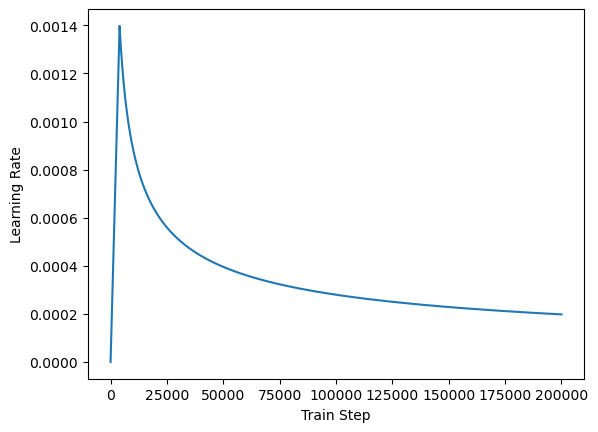

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')

print('챗봇 샘플의 개수 :', len(train_data))
print(train_data.isnull().sum())

questions = []
for sentence in train_data['Q']:
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

answers = []
for sentence in train_data['A']:
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

print(questions[:5])
print(answers[:5])

# 서브워드 텍스트 인코더로 단어 집합 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
VOCAB_SIZE = tokenizer.vocab_size + 2

print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

sample_string = questions[20]
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

MAX_LENGTH = 40

def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  for (sentence1, sentence2) in zip(inputs, outputs):
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

questions, answers = tokenize_and_filter(questions, answers)

print('질문 데이터 shape:', questions.shape)
print('답변 데이터 shape:', answers.shape)
print(questions[0])
print(answers[0])

BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]  # (batch, 39)
    },
    {
        'outputs': answers[:, 1:]      # (batch, 39)
    },
))

def to_dense_if_sparse(x):
    return tf.sparse.to_dense(x) if isinstance(x, tf.SparseTensor) else x

dataset = dataset.map(lambda x, y: (
    {
        'inputs': to_dense_if_sparse(x['inputs']),
        'dec_inputs': to_dense_if_sparse(x['dec_inputs'])
    },
    {
        'outputs': to_dense_if_sparse(y['outputs'])
    }
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print(answers[0])
print(answers[:1][:, :-1])
print(answers[:1][:, 1:])

class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    sines = tf.math.sin(angle_rads[:, 0::2])
    cosines = tf.math.cos(angle_rads[:, 1::2])
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    if isinstance(inputs, tf.SparseTensor):
        inputs = tf.sparse.to_dense(inputs)
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

def scaled_dot_product_attention(query, key, value, mask):
  matmul_qk = tf.matmul(query, key, transpose_b=True)
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)
  if mask is not None:
    logits += (mask * -1e9)
  attention_weights = tf.nn.softmax(logits, axis=-1)
  output = tf.matmul(attention_weights, value)
  return output

class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model
    assert d_model % self.num_heads == 0
    self.depth = d_model // self.num_heads
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)
    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
    batch_size = tf.shape(query)[0]
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
    concat_attention = tf.reshape(scaled_attention,(batch_size, -1, self.d_model))
    outputs = self.dense(concat_attention)
    return outputs

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
  attention = MultiHeadAttention(d_model, num_heads, name="attention")({
      'query': inputs, 'key': inputs, 'value': inputs, 'mask': padding_mask
  })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)
  return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs", dtype=tf.int32)
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(MAX_LENGTH, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
  for i in range(num_layers):
    outputs = encoder_layer(units=units,
                            d_model=d_model,
                            num_heads=num_heads,
                            dropout=dropout,
                            name="encoder_layer_{}".format(i))([outputs, padding_mask])
  return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  attention1 = MultiHeadAttention(d_model, num_heads, name="attention_1")(inputs={
      'query': inputs, 'key': inputs, 'value': inputs, 'mask': look_ahead_mask
  })
  attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)
  attention2 = MultiHeadAttention(d_model, num_heads, name="attention_2")(inputs={
      'query': attention1, 'key': enc_outputs, 'value': enc_outputs, 'mask': padding_mask
  })
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)
  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs', dtype=tf.int32)
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(MAX_LENGTH, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
  for i in range(num_layers):
    outputs = decoder_layer(units=units,
                            d_model=d_model,
                            num_heads=num_heads,
                            dropout=dropout,
                            name='decoder_layer_{}'.format(i))(
                              [outputs, enc_outputs, look_ahead_mask, padding_mask])
  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs", dtype=tf.int32)
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs", dtype=tf.int32)
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout
    )(inputs=[inputs, enc_padding_mask])

    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

tf.keras.backend.clear_session()

NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

def loss_function(y_true, y_pred):
  y_pred = y_pred[:, :tf.shape(y_true)[1], :]
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)
  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)
  return tf.reduce_mean(loss)

# 여기서 step이 int64 -> float32 캐스팅 필요
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = tf.cast(d_model, tf.float32)
    self.warmup_steps = tf.cast(warmup_steps, tf.float32)

  def __call__(self, step):
    step = tf.cast(step, tf.float32)  # int64를 float32로 변환
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

sample_learning_rate = CustomSchedule(d_model=128)
plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_pred = y_pred[:, :tf.shape(y_true)[1], :]
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

EPOCHS = 100
model.fit(dataset, epochs=EPOCHS, verbose=1)


In [8]:
def preprocess_sentence(sentence):
  # 단어와 구두점 사이에 공백 추가.
  # ex) 12시 땡! -> 12시 땡 !
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [9]:
def evaluate(sentence):
  # 입력 문장에 대한 전처리
  sentence = preprocess_sentence(sentence)

  # 입력 문장에 시작 토큰과 종료 토큰을 추가
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 현재 시점의 예측 단어를 output(출력)에 연결한다.
    # output은 for문의 다음 루프에서 디코더의 입력이 된다.
    output = tf.concat([output, predicted_id], axis=-1)

  # 단어 예측이 모두 끝났다면 output을 리턴.
  return tf.squeeze(output, axis=0)

In [10]:
def predict(sentence):
  prediction = evaluate(sentence)

  # prediction == 디코더가 리턴한 챗봇의 대답에 해당하는 정수 시퀀스
  # tokenizer.decode()를 통해 정수 시퀀스를 문자열로 디코딩.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [11]:
output = predict("영화 볼래?")

Input: 영화 볼래?
Output: 영화 볼 ? ?


In [12]:
output = predict("고민이 있어")

Input: 고민이 있어
Output: 고민이 있어


In [13]:

output = predict("너무 화가나")

Input: 너무 화가나
Output: 너무 잘 


In [14]:
output = predict("이번 주말에 어디를 놀러가면 좋을까?")

Input: 이번 주말에 어디를 놀러가면 좋을까?
Output: 이번 주말에 어디를  .면  ? ?
